In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.parameter import Parameter
from src.unit_commitment import solve_uc

In [2]:
parameter = Parameter(
    # system
    load=[220, 250, 200, 170, 230, 190],
    reserve=[10, 10, 10, 10, 10, 10],
    # power
    p_min=[80, 50, 30],
    p_max=[300, 200, 100],
    ramp_up=[50, 60, 70],
    ramp_down=[30, 40, 50],
    startup_ramp=[100, 70, 40],
    shutdown_ramp=[80, 50, 30],
    # time
    min_up=[3, 2, 1],
    min_down=[2, 2, 2],
    # generator cost function
    cost_quad=[0, 0, 0],
    cost_lin=[5, 15, 30],
    cost_const=[0, 0, 0],
    # pervious horizon
    min_up_prev=[2, 0, 0],
    min_down_prev=[0, 0, 0],
    p_prev=[
        [120], 
        [0],
        [0],
    ],
    u_prev=[
        [1], 
        [0], 
        [0],
    ],
    # startup cost piecewise function
    cost_startup_step=[
        [800],
        [500],
        [250],
    ],
)

In [3]:
output = solve_uc(parameter=parameter)

Set parameter Username
Set parameter LicenseID to value 2659802
Academic license - for non-commercial use only - expires 2026-05-01


In [6]:
parameter.p_max

[300, 200, 100]

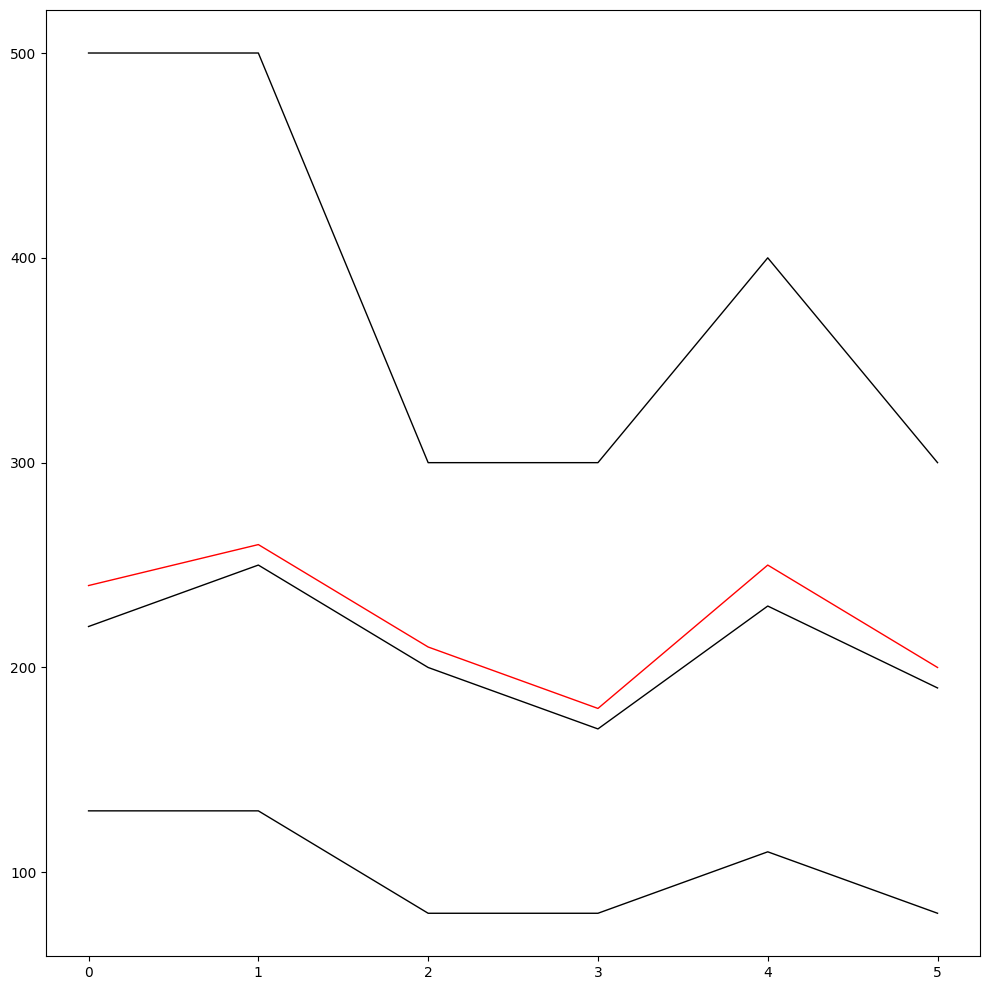

In [18]:
num_periods = parameter.num_periods
time_horizon = np.arange(parameter.num_periods)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot(
    time_horizon,
    output.p_max_t,
    color="black",
    linewidth=1,
)

ax.plot(
    time_horizon,
    output.p_min_t,
    color="black",
    linewidth=1,
)

ax.plot(
    time_horizon,
    output.p.sum(axis=0),
    color="black",
    linewidth=1,
)

ax.plot(
    time_horizon,
    output.p_bar.sum(axis=0),
    color="red",
    linewidth=1,
)



fig.tight_layout()
plt.show(fig)